In [1]:
from nitropulse import RegressionRF

In [2]:
import pandas as pd

In [3]:
# Load df from CSV
inv_df = pd.read_csv("/home/morteza/.nitropulse/outputs/inv_df.csv", parse_dates=['date'])

print(inv_df.shape)
inv_df.head()

(5051, 41)


,index,date,op,VH,VV,angle,lc,Station,station,depth,...,c,w,vvv,vvs,s,l,rvi,height,k,b
0,0,2015-03-28 00:56:57,0,-21.0,-11.0,41.0,110,SK3,SK3,0 to 5 cm,...,0.091748,0.094531,-13.991384,-14.029299,0.038240,0.083454,0.363636,0.002909,0.80,0.0
1,0,2015-03-28 00:56:57,0,-15.0,-11.0,41.0,110,SK4,SK4,0 to 5 cm,...,0.100000,0.100000,-14.047640,-13.973278,0.038606,0.074577,1.138989,0.009112,0.80,0.0
2,0,2015-03-28 00:56:57,0,-17.0,-11.0,41.0,122,SK2,SK2,0 to 5 cm,...,0.100000,0.100000,-14.060940,-13.960243,0.040100,0.074518,0.803040,0.008030,1.00,0.0
3,0,2015-03-28 00:56:57,0,-18.0,-11.0,41.0,122,SK1,SK1,0 to 5 cm,...,0.091390,0.104585,-13.958707,-14.062513,0.044286,0.081773,0.665350,0.006654,1.00,0.0
4,0,2015-04-25 00:23:20,0,-20.0,-11.0,40.0,158,MB7,MB7,0 to 5 cm,...,0.094532,0.111709,-14.053754,-13.967277,0.040103,0.081387,0.447263,0.004249,0.95,0.0


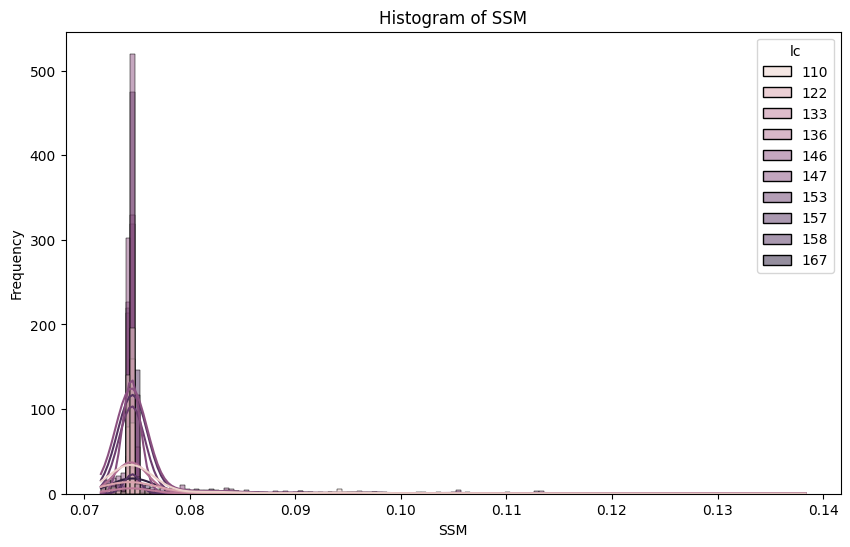

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(inv_df, x='l', kde=True, hue='lc')
plt.title('Histogram of SSM')
plt.xlabel('SSM')
plt.ylabel('Frequency')
plt.show()

In [5]:
ensrf = RegressionRF(workspace_dir='/home/morteza/.nitropulse', df=inv_df)
rf_models = ensrf.run(vars=['vvs', 's', 'l', 'ssm'])

Training ensemble models:   0%|          | 0/4 [00:00<?, ?it/s]

Training model for 'vvs' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for vvs:
	R2: 0.9905
	MAE: 0.1774
	MSE: 0.0924
	RMSE: 0.3039
	UBRMSE: 0.3039
	Bias: -0.0009

Training model for 's' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for s:
	R2: 0.9107
	MAE: 0.0016
	MSE: 0.0000
	RMSE: 0.0021
	UBRMSE: 0.0021
	Bias: 0.0000

Training model for 'l' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for l:
	R2: 0.4194
	MAE: 0.0013
	MSE: 0.0000
	RMSE: 0.0039
	UBRMSE: 0.0039
	Bias: -0.0004

Training model for 'ssm' using features: ['angle', 'vvs', 's', 'l', 'year', 'doy', 'lc', 'op']
Metrics for ssm:
	R2: 0.7161
	MAE: 0.0426
	MSE: 0.0031
	RMSE: 0.0555
	UBRMSE: 0.0554
	Bias: -0.0023



In [6]:
gee_project_id = 'ee-mortezakhazaei1370'
RT_models = {'RT_s': 'AIEM', 'RT_c': 'Diff'}
ensrf.upload_rf_to_gee(rf_models, gee_project_id, rt_models=RT_models)

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_7TDKVSyKvBdmMqW?ref=4i2o6


Uploading models to GEE:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading model for 'vvs' as asset 'projects/ee-mortezakhazaei1370/assets/AIEM_ensemble_trees_vvs_n15_md15_665696' with features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Uploading model for 's' as asset 'projects/ee-mortezakhazaei1370/assets/AIEM_ensemble_trees_s_n15_md15_68e058' with features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Uploading model for 'l' as asset 'projects/ee-mortezakhazaei1370/assets/AIEM_ensemble_trees_l_n15_md15_529b4d' with features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Uploading model for 'ssm' as asset 'projects/ee-mortezakhazaei1370/assets/AIEM_ensemble_trees_ssm_n15_md15_930561' with features: ['angle', 'vvs', 's', 'l', 'year', 'doy', 'lc', 'op']
